Install the latest nsc if you haven't already done so. See source [here](https://test.pypi.org/project/nsc/) .

In [36]:
# !python3 -m pip uninstall nsc -y -q
# !python3 -m pip install nsc
# !python3 -m pip install -i https://test.pypi.org/simple/ nsc -q

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()
from collections import defaultdict
from typing import List

# From nsc lib
import nsc
from nsc import distributions as nsd
from nsc.util import function as nsc_func
# nsd = nsc.distributions

Importing NSC lib v0.0.2.


### ***Coupled Logarithm function***

In [3]:
n_sample = 10000

In [4]:
# n_sample of linearly spaced numbers, starting from CLOSE to 0
X = np.linspace(1e-6, 5, n_sample)
X

array([1.00000000e-06, 5.01049905e-04, 1.00109981e-03, ...,
       4.99899990e+00, 4.99949995e+00, 5.00000000e+00])

In [5]:
y = {}

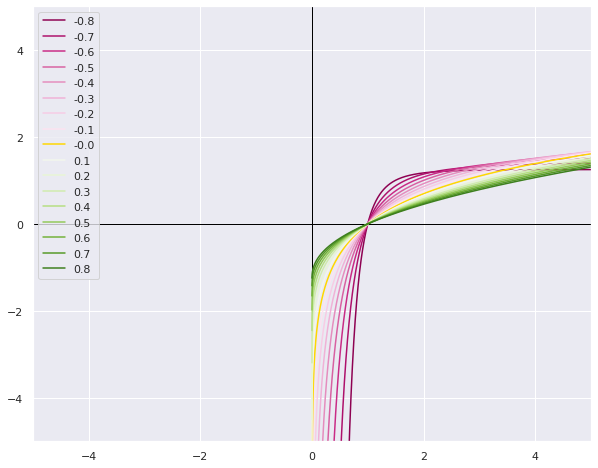

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(-0.8, 0.9, 0.1)]
n = len(kappa_values)
ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.xlim(-5, 5)
plt.ylim(-5, 5)

for kappa in kappa_values:
    y[kappa] = nsc.log(X, kappa)
    # y[kappa] = nsc_func.coupled_logarithm(X, kappa)
    plt.plot(X, y[kappa], label=kappa)

plt.legend()
plt.show();

Compare nsc's log with numpy's log.

/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/nsc/util/function.py:26: RuntimeWarning: invalid value encountered in log
  coupled_log_value = np.log(value)  # divide by 0 if x == 0
/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


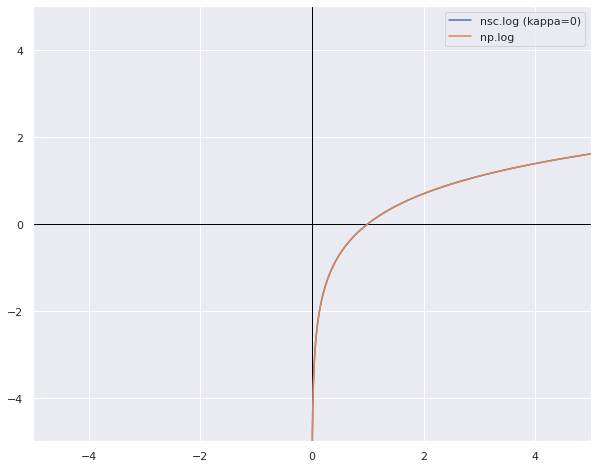

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.plot(X, nsc.log(X, kappa=0), label='nsc.log (kappa=0)')
plt.plot(X, np.log(X), label='np.log')

plt.legend()
plt.show();

You can see that that nsc's log of kappa=0 is exactly equal to natural log in numpy.

### ***Coupled Exponential function***

In [7]:
# n_sample of linearly spaced numbers, starting from -5
X = np.linspace(-5, 5, n_sample)

In [8]:
y = {}

Skipped ZeroDivisionError at the following: value = 5.0, kappa = -0.2. Therefore,(1+kappa*value) = 0.0


/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/nsc/util/function.py:64: RuntimeWarning: invalid value encountered in power
  coupled_exp_value = (1 + kappa*value)**(1 / (kappa / (1 + dim*kappa)))
/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/nsc/util/function.py:64: RuntimeWarning: invalid value encountered in power
  coupled_exp_value = (1 + kappa*value)**(1 / (kappa / (1 + dim*kappa)))
/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/nsc/util/function.py:64: RuntimeWarning: invalid value encountered in power
  coupled_exp_value = (1 + kappa*value)**(1 / (kappa / (1 + dim*kappa)))
/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/nsc/util/function.py:64: RuntimeWarning: invalid value encountered in power
  coupled_exp_value = (1 + kappa*value)**(1 / (kappa / (1 + dim*kappa)))
/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/nsc/util/function.py:64: RuntimeWarning: invalid value encountered in power
  coupled_exp_value = (1 + kappa*

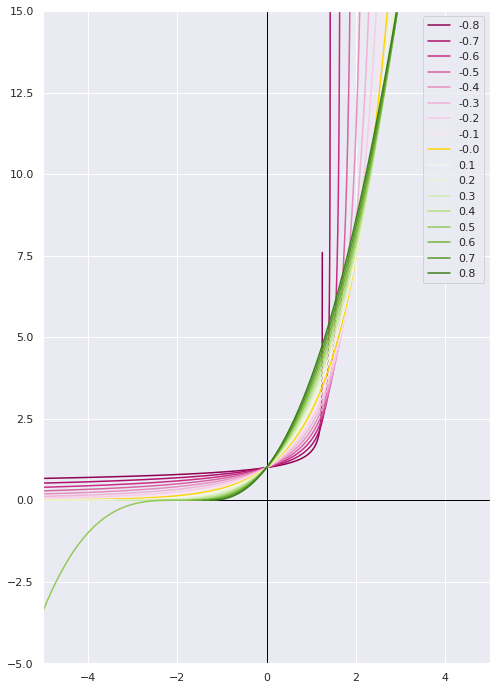

In [9]:
fig, ax = plt.subplots(figsize=(8, 12))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(-0.8, 0.9, 0.1)]
n = len(kappa_values)
ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.xlim(-5, 5)
plt.ylim(-5, 15)

for kappa in kappa_values:
    y[kappa] = nsc.exp(X, kappa)
    # y[kappa] = nsc_func.coupled_exponential(X, kappa)
    plt.plot(X, y[kappa], label=kappa)

plt.legend()
plt.show();

Compare nsc's exp with numpy's exp.

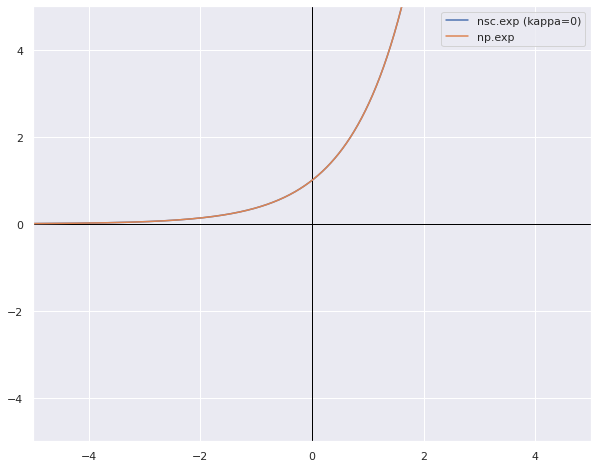

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.plot(X, nsc.exp(X, kappa=0), label='nsc.exp (kappa=0)')
plt.plot(X, np.exp(X), label='np.exp')

plt.legend()
plt.show();

You can see that that nsc's exp of kappa=0 is exactly equal to natural exp in numpy.

### ***Coupled Normal Distribution class***

In [10]:
# Define the loc, scale, alpha, and kappas that will be used for all distributions.
loc, scale = 0., 1.
alpha = 2

In [11]:
# Define the values the various Coupled Gaussians can range from -6*scale to 6*scale
X = np.linspace(-6*scale, 6*scale, n_sample)

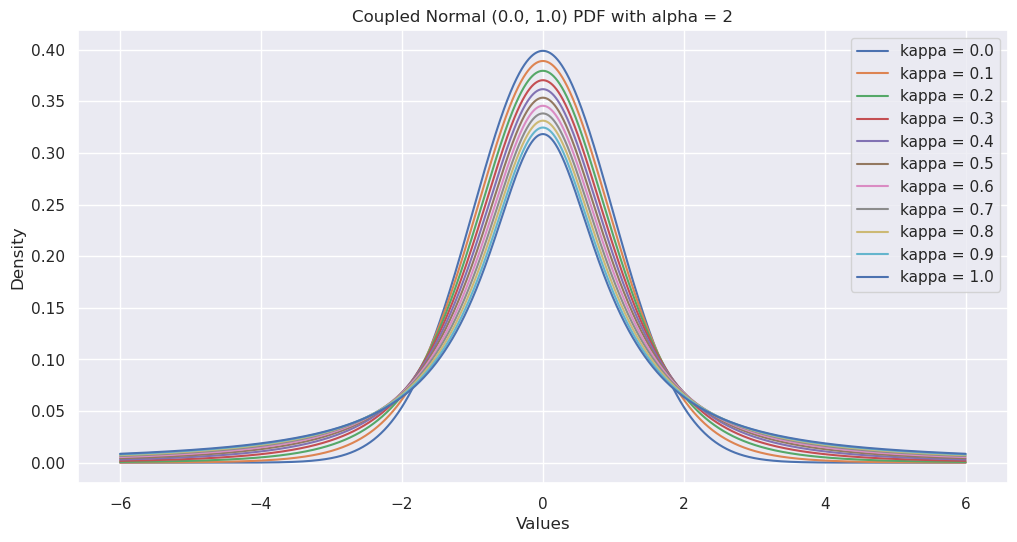

In [12]:
# Plot Coupled Gaussians (loc, scale) with alpha = 2, with kappas going from 0 to 1
# by steps of 0.1
cm = plt.get_cmap('PiYG')
kappa_values = np.linspace(0, 1, 11)
n = len(kappa_values)
ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.figure(figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k')

for kappa in kappa_values:
    temp_normal = nsd.CoupledNormal(loc=loc,
                                    scale=scale,
                                    kappa=round(kappa, 1),
                                    alpha=alpha,
                                    verbose=False
                                    )
    plt.plot(X, temp_normal.prob(X), label=f'kappa = {temp_normal.kappa}')

plt.title(f'Coupled Normal ({loc}, {scale}) PDF with alpha = {alpha}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

Create a Coupled Normal distribution *p* to try out some of its functions.

In [13]:
# Pick a specific kappa
p_loc = 0.
p_scale = 1.
p_kappa = 0.5
p_alpha = 2

In [14]:
p_dist = nsd.CoupledNormal(loc=loc, scale=scale, kappa=kappa, alpha=alpha)

<nsc.distributions.CoupledNormal batch_shape=[] event_shape=[]>


In [15]:
# Number of dimensions
p_dist.n_dim()

1

In [16]:
p_pdf = p_dist.prob(X)
p_pdf

array([0.00860297, 0.00860632, 0.00860967, ..., 0.00860967, 0.00860632,
       0.00860297])

We will be using p_pdf in subsequent functions

Compare it with a Student-T with DoF = 2, same loc and scale.

In [20]:
import tensorflow_probability as tfp
tfd = tfp.distributions

In [21]:
t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)

In [22]:
t_pdf = t_dist.prob(X)
t_pdf

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([0.00426899, 0.00427141, 0.00427384, ..., 0.00427384, 0.00427141,
       0.00426899], dtype=float32)>

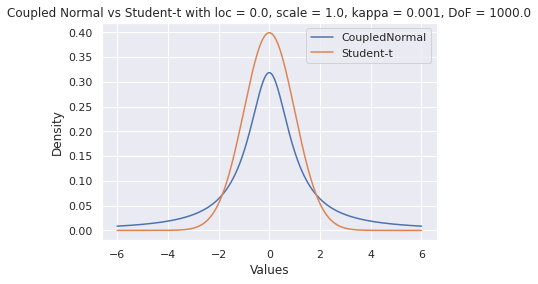

In [43]:
plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {p_kappa}, DoF = {1/p_kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

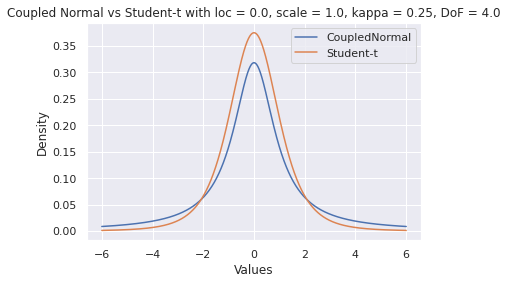

In [44]:
p_kappa = 0.25
p_dist = nsd.CoupledNormal(loc=loc, scale=scale, kappa=kappa, alpha=alpha, verbose=False)
p_pdf = p_dist.prob(X)

t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)
t_pdf = t_dist.prob(X)

plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {p_kappa}, DoF = {1/p_kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

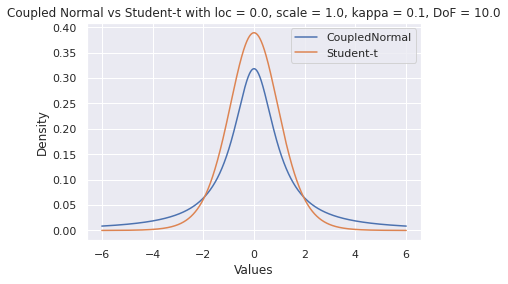

In [45]:
p_kappa = 0.1
p_dist = nsd.CoupledNormal(loc=loc, scale=scale, kappa=kappa, alpha=alpha, verbose=False)
p_pdf = p_dist.prob(X)

t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)
t_pdf = t_dist.prob(X)

plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {p_kappa}, DoF = {1/p_kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

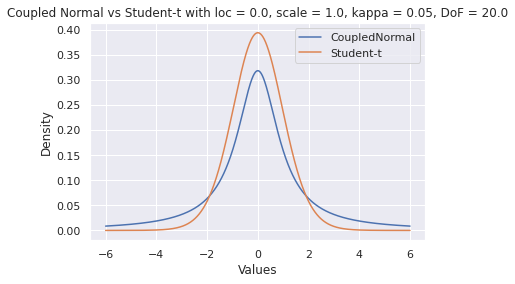

In [46]:
p_kappa = 0.05
p_dist = nsd.CoupledNormal(loc=loc, scale=scale, kappa=kappa, alpha=alpha, verbose=False)
p_pdf = p_dist.prob(X)

t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)
t_pdf = t_dist.prob(X)

plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {p_kappa}, DoF = {1/p_kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

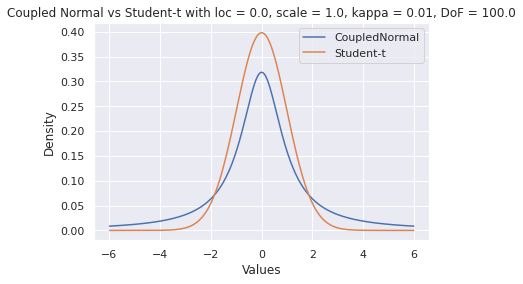

In [47]:
p_kappa = 0.01
p_dist = nsd.CoupledNormal(loc=loc, scale=scale, kappa=kappa, alpha=alpha, verbose=False)
p_pdf = p_dist.prob(X)

t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)
t_pdf = t_dist.prob(X)

plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {p_kappa}, DoF = {1/p_kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

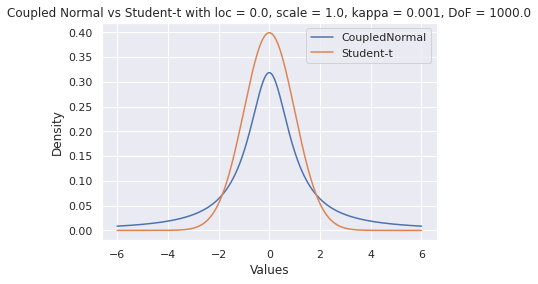

In [48]:
p_kappa = 0.001
p_dist = nsd.CoupledNormal(loc=loc, scale=scale, kappa=kappa, alpha=alpha, verbose=False)
p_pdf = p_dist.prob(X)

t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)
t_pdf = t_dist.prob(X)

plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {p_kappa}, DoF = {1/p_kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

In [52]:
# Sample n amount
# TO-DO

### ***Coupled Entropy function***

In [53]:
# Set dim 1 for scalar inputs
p_dim = 1

In [54]:
# Calculate the distance between values of x for numerical integration.
dX = np.mean(X[1:] - X[:-1])

In [55]:
nsc.entropy(p_pdf, dx=dX, kappa=p_kappa, alpha=p_alpha, dim=p_dim, root=False)

2.3340514300705713

Plot coupled entropy function in comparison with other common entropy functions

In [56]:
# plt.figure(figsize=(12, 8))
Y = {}
plot_coupledEntropy = []
plot_coupledEntropy_root = []
plot_tsallisEntropyNormalized = []
plot_tsallisEntropy = []
plot_tsallisEntropyRootNormalized = []
plot_tsallisEntropyRoot = []
plot_shannonEntropy = []
plot_shannonEntropy_root = []

kappa_values = [round(value, 1) for value in np.arange(0.0, 4, 0.1)]
n = len(kappa_values)

mu, sigma = 0., 1.
alpha = 2
dim = 1
for kappa in kappa_values:
    temp_normal = nsd.CoupledNormal(loc=loc,
                                    scale=scale,
                                    kappa=kappa,
                                    alpha=alpha,
                                    verbose=False
                                    )
    y = temp_normal.prob(X)
    Y[kappa] = nsc_func.coupled_entropy(y, dx=dX, kappa=kappa, alpha=alpha, dim=dim, root=False)
    plot_coupledEntropy.append(Y[kappa])
    Y[kappa] = nsc_func.coupled_entropy(y, kappa=kappa, dx=dX, alpha=alpha, dim=dim, root=True)
    plot_coupledEntropy_root.append(Y[kappa])
    Y[kappa] = nsc_func.tsallis_entropy(y, dx=dX, kappa=kappa, alpha=alpha, dim=dim, normalize=True, root=False)
    plot_tsallisEntropyNormalized.append(Y[kappa])
    Y[kappa] = nsc_func.tsallis_entropy(y, dx=dX, kappa=kappa, alpha=alpha, dim=dim, normalize=False, root=False)
    plot_tsallisEntropy.append(Y[kappa])
    Y[kappa] = nsc_func.tsallis_entropy(y, dx=dX, kappa=kappa, alpha=alpha, dim=dim, normalize=True, root=True)
    plot_tsallisEntropyRootNormalized.append(Y[kappa])
    Y[kappa] = nsc_func.tsallis_entropy(y, dx=dX, kappa=kappa, alpha=alpha, dim=dim, normalize=False, root=True)
    plot_tsallisEntropyRoot.append(Y[kappa])
    Y[kappa] = nsc_func.shannon_entropy(y, dx=dX, dim=dim, root=False)
    plot_shannonEntropy.append(Y[kappa])
    Y[kappa] = nsc_func.shannon_entropy(y, dx=dX, dim=dim, root=True)
    plot_shannonEntropy_root.append(Y[kappa])

fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
plt.ylim(-1, 14)
plt.plot(kappa_values, plot_coupledEntropy, label='Coupled Entropy',
         color='blue')
plt.plot(kappa_values, plot_tsallisEntropyNormalized, label='Normalized Tsallis Entropy',
         color='green')
plt.plot(kappa_values, plot_tsallisEntropy, label='Tsallis Entropy',
         color='orange')
plt.plot(kappa_values, plot_shannonEntropy, label='Shannon Entropy',
         color='red')
plt.grid()
plt.title(f'Coupled Gaussian {round(mu), round(sigma)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

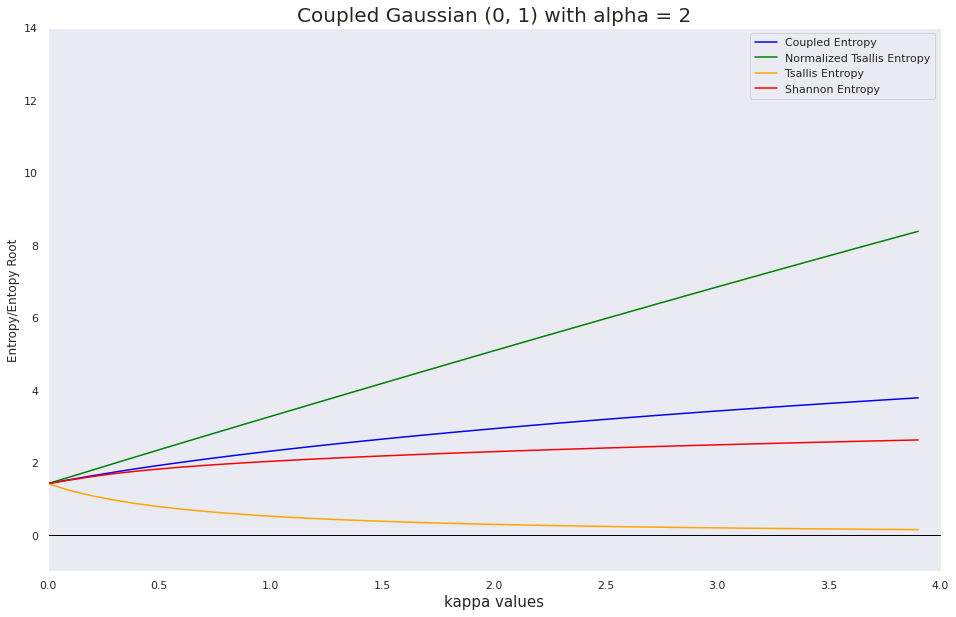

In [57]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
plt.ylim(-1, 14)
plt.plot(kappa_values, plot_coupledEntropy, label='Coupled Entropy',
         color='blue')
plt.plot(kappa_values, plot_tsallisEntropyNormalized, label='Normalized Tsallis Entropy',
         color='green')
plt.plot(kappa_values, plot_tsallisEntropy, label='Tsallis Entropy',
         color='orange')
plt.plot(kappa_values, plot_shannonEntropy, label='Shannon Entropy',
         color='red')
plt.grid()
plt.title(f'Coupled Gaussian {round(mu), round(sigma)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

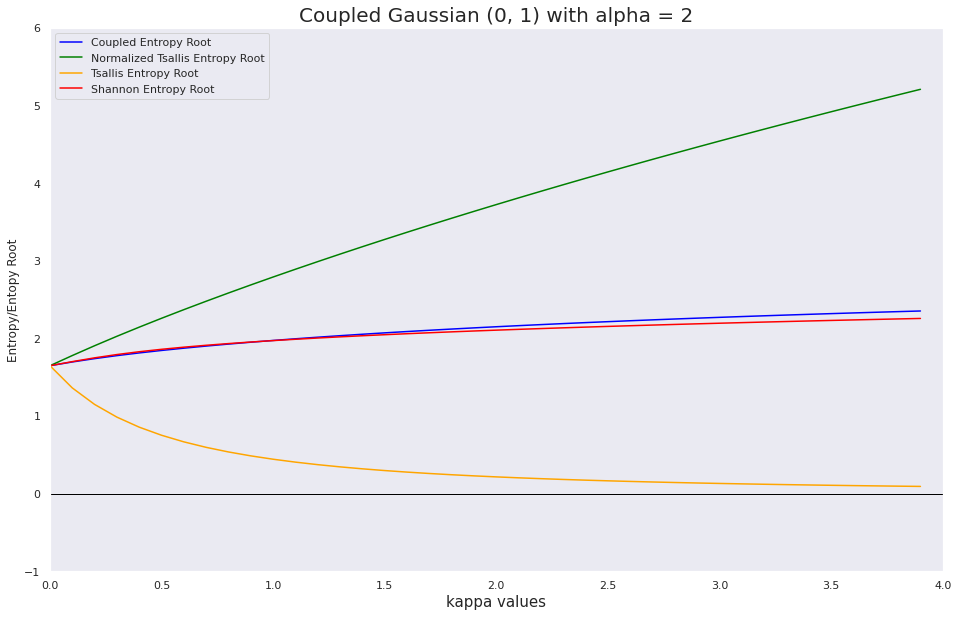

In [23]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
plt.ylim(-1, 6)

plt.plot(kappa_values, plot_coupledEntropy_root, label='Coupled Entropy Root',
         color='blue')
plt.plot(kappa_values, plot_tsallisEntropyRootNormalized, label='Normalized Tsallis Entropy Root',
         color='green')
plt.plot(kappa_values, plot_tsallisEntropyRoot, label='Tsallis Entropy Root',
         color='orange')
plt.plot(kappa_values, plot_shannonEntropy_root, label='Shannon Entropy Root',
         color='red')
plt.grid()
plt.title(f'Coupled Gaussian {round(mu), round(sigma)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

### ***Coupled Cross-Entropy function***

Create a new Coupled Normal distribution *q* with the kappa of 0. Hence, it is a regular Normal distribution.

In [58]:
q_loc = 0.
q_scale = 1.
q_kappa = 0.
q_alpha = 2

In [59]:
q_dist = nsd.CoupledNormal(loc=q_loc, scale=q_scale, kappa=q_kappa, alpha=q_alpha)
q_pdf = q_dist.prob(X)

<nsc.distributions.CoupledNormal batch_shape=[] event_shape=[]>


In [60]:
nsc.cross_entropy(p_pdf, q_pdf, dx=dX, kappa=p_kappa, alpha=p_alpha, dim=dim, root=False)

254.41855256757532

In [61]:
nsc.cross_entropy(p_pdf, q_pdf, dx=dX, kappa=q_kappa, alpha=q_alpha, dim=dim, root=False)

2.5531860479129587

### ***Coupled KL-Divergence function***

In [62]:
nsc.kl_divergence(p_pdf, q_pdf, dx=dX, kappa=p_kappa, alpha=p_alpha, dim=dim, root=False)

252.08450113750476

In [63]:
nsc.kl_divergence(p_pdf, q_pdf, dx=dX, kappa=p_kappa, alpha=p_alpha, dim=dim, root=True)

1.4319599814156159

In [64]:
nsc.kl_divergence(p_pdf, q_pdf, dx=dX, kappa=q_kappa, alpha=q_alpha, dim=dim, root=False)

0.5177973531870315

In [65]:
nsc.kl_divergence(p_pdf, q_pdf, dx=dX, kappa=q_kappa, alpha=q_alpha, dim=dim, root=True)

0.0639906698875512

In [66]:
nsc.kl_divergence(p_pdf, p_pdf, dx=dX, kappa=p_kappa, alpha=p_alpha, dim=dim, root=False)

0.0

### ***Generalized Mean function***

In [33]:
# TO-DO

Credits: Kevin R. Chen, John Clements, Daniel Svooda